In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [67]:
df = pd.read_csv(r'C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\CarRentalReview.csv', encoding='ISO-8859-1')

In [9]:
print(df.head())

   ID car_name                                             review
0   2  audi A6  I liked the Audi over the Mercedes, BMW, and L...
1   3  audi A4  Best car I've ever owned, hands down. I am a 3...
2   4  audi A3  I am so impressed with the new A3, itâs quic...
3   5  audi Q3  While I am reviewing the Q3 I got a mere five ...
4   6  audi Q5  Great suv with many bells and whistles. Smooth...


In [69]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [71]:
from textblob import TextBlob

In [73]:
def get_rating(review):
    analysis = TextBlob(review)
    # Normalize the polarity score from [-1, 1] to [1, 5]
    rating = int((analysis.sentiment.polarity + 1) * 2)  # scale to [0, 2]
    rating += 1  # scale to [1, 5]
    return rating

In [75]:
df['rating'] = df['review'].apply(get_rating)

In [77]:
# Display the updated DataFrame with the rating column
print(df[['ID', 'car_name', 'review', 'rating']].head())

   ID car_name                                             review  rating
0   2  audi A6  I liked the Audi over the Mercedes, BMW, and L...       3
1   3  audi A4  Best car I've ever owned, hands down. I am a 3...       3
2   4  audi A3  I am so impressed with the new A3, itâs quic...       4
3   5  audi Q3  While I am reviewing the Q3 I got a mere five ...       3
4   6  audi Q5  Great suv with many bells and whistles. Smooth...       3


In [79]:
# Count the occurrences of each sentiment rating
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)

rating
2     3
3    59
4    11
5     1
Name: count, dtype: int64


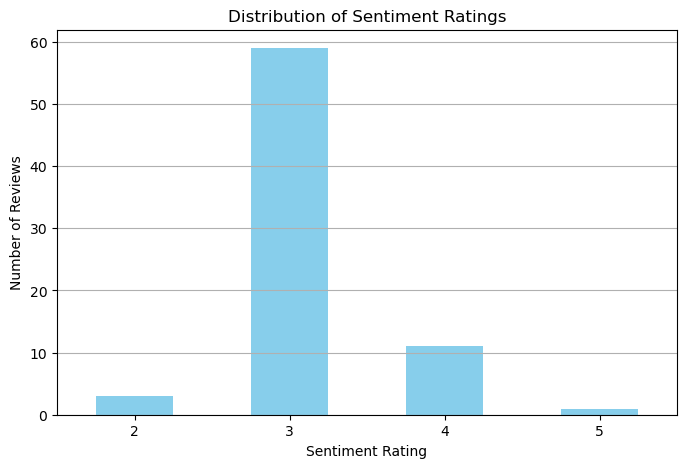

In [81]:
import matplotlib.pyplot as plt

# Create a bar plot of sentiment ratings
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Ratings')
plt.xlabel('Sentiment Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [83]:
# Specify the output file path
output_file_path = r'C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\RatingFromReview_TextBlob.csv'

# Save the DataFrame to a CSV file
df[['ID', 'car_name', 'review', 'rating']].to_csv(output_file_path, index=False)
print(f"File saved at: {output_file_path}")

File saved at: C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\RatingFromReview_TextBlob.csv


In [100]:
pwd

'C:\\Users\\Hp\\Documents\\Jupyter Notebook\\CarRentalReview'

In [85]:
import os
print(os.getcwd())

C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview


In [87]:
print(df[['ID', 'car_name', 'review', 'rating']].tail(2))

     ID     car_name                                             review  \
72  133  Toyota test  Car body was awesome. I reached the destinatio...   
73  134      New Car             The driver was nice. We reaced safely.   

    rating  
72       5  
73       4  


In [89]:
import os

def add_review_and_update_csv(new_review):
    # Paths to the original and ratings CSV files
    original_file_path = r'C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\CarRentalReview.csv'
    output_file_path = r'C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\RatingFromReview_TextBlob.csv'

    # Load existing reviews
    df = pd.read_csv(original_file_path)

    # Generate a new ID for the new review
    new_id = df['ID'].max() + 1 if not df.empty else 1

    # Calculate rating for the new review
    rating = get_rating(new_review)

    # Create a DataFrame for the new row (without the rating column)
    new_row = pd.DataFrame({
        'ID': [new_id],
        'car_name': ['New Car'],
        'review': [new_review]
    })

    # Concatenate the new row with the existing DataFrame
    df = pd.concat([df, new_row], ignore_index=True)

    # Save the updated DataFrame to the original file without the rating column
    df.to_csv(original_file_path, index=False)
    print(f"Original file updated and saved at: {original_file_path}")

    # Add the rating to the ratings CSV
    df_ratings = pd.read_csv(output_file_path) if os.path.exists(output_file_path) else pd.DataFrame(columns=['ID', 'car_name', 'review', 'rating'])
    new_row_with_rating = new_row.copy()
    new_row_with_rating['rating'] = rating
    df_ratings = pd.concat([df_ratings, new_row_with_rating], ignore_index=True)
    df_ratings.to_csv(output_file_path, index=False)
    print(f"Ratings file updated and saved at: {output_file_path}")

# Example usage
add_review_and_update_csv("The road was difficult. Thanks to the driver for his smooth driving")

Original file updated and saved at: C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\CarRentalReview.csv
Ratings file updated and saved at: C:\Users\Hp\Documents\Jupyter Notebook\CarRentalReview\RatingFromReview_TextBlob.csv
